Task 1 - Identified a Pokemon that is best suited for battle against Jolteon.

Task 2 - The boxplot of HP across the different generations after removing the outliers.

Task 1 - Understanding the Context

In [42]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [45]:
#read csv file in pandas

df = pd.read_csv("/content/Pokemon.csv")
profile = ProfileReport(df)
profile.to_file(output_file="pokemon.html")


TypeError: ignored

In [8]:
# summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
df.fillna(0)
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [10]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [11]:
df.sort_values("Name")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False
68,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
392,359,Absol,Dark,NaN,465,65,130,60,75,60,75,3,False
393,359,AbsolMega Absol,Dark,NaN,565,65,150,60,115,60,115,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,571,Zoroark,Dark,NaN,510,60,105,60,120,60,105,5,False
631,570,Zorua,Dark,NaN,330,40,65,40,80,40,65,5,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
695,634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,False


In [12]:
#total number of rows & columns in the df

df.shape

(800, 13)

In [13]:
#In total, how many Pokemons are there in the dataset?
df["Name"].value_counts().sum()

800

In [14]:
#number of duplicated rows
df["Name"].duplicated().value_counts()

False    800
Name: Name, dtype: int64

In [15]:
#How many legendary Pokemon are there?
df["Legendary"].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [16]:
#Which Pokemon has the highest Attack?
df.sort_values(by = "Attack", ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


In [17]:
#Which Pokemon has the lowest HP?
df.sort_values(by = "HP", ascending=True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
388,355,Duskull,Ghost,NaN,295,20,40,90,30,90,25,3,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


In [18]:
#Which generation has the most number of Pokemon?
df["Generation"].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [19]:
#What is the most common Speed?
df["Speed"].value_counts()

50     46
60     44
70     37
65     36
30     35
       ..
39      1
24      1
82      1
113     1
123     1
Name: Speed, Length: 108, dtype: int64

In [20]:
#Which Type 1 Flying Pokemon has the highest Sp. Atk?
df.sort_values(by = "Sp. Atk", ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,554,Darumaka,Fire,NaN,315,70,90,45,15,45,50,5,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False


In [21]:
#Which Type 1 Flying Pokemon has the highest Sp. Atk?
df[df["Type 1"] == "Flying"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
702,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False


In [22]:
#In Generation 2, how many Type 2 Fairy Pokemon are there?
df[df["Type 2"] == "Fairy"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
198,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
199,184,Azumarill,Water,Fairy,420,100,50,80,60,80,50,2,False
303,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
304,281,Kirlia,Psychic,Fairy,278,38,35,35,65,55,50,3,False
305,282,Gardevoir,Psychic,Fairy,518,68,65,65,125,115,80,3,False
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False


In [23]:
#finding more information about Jolteon
df[df["Name"] == "Jolteon"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
146,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False


In [24]:
#Narrowing the Search by Type

df_type = df[df["Type 1"] == "Ground"]
df_type

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
32,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
112,104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
119,111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False
222,207,Gligar,Ground,Flying,430,65,75,105,35,65,85,2,False
250,231,Phanpy,Ground,NaN,330,90,60,60,40,40,40,2,False


In [25]:
#Narrowing the Search by Generation

df_type_gen1 = df_type[df_type["Generation"] == 1]
df_type_gen1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
32,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
112,104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
119,111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False


In [26]:
#Apply the .sort_values() function to df_type_gen1

df_type_gen1.sort_values(by = "Sp. Def", ascending=False, axis=0)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
112,104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False
32,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
119,111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False


In [27]:
#Identify the Best Suited Pokemon having high Sp.Def in Generation 1

df_type_gen1_sorted = df_type_gen1[df_type_gen1["Sp. Def"] == 80]
df_type_gen1_sorted

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False


Task 2 - Understanding the Context

In [28]:
# Import visualization packages "Matplotlib" and "Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

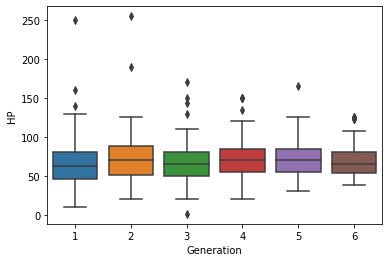

In [29]:
#Generate graphs HP of Pokemon across different generations

sns.boxplot(x = "Generation", y = "HP", data=df)

In [30]:
#Finding a Quantile - 97% quantile of HP

quantile_97 = df["HP"].quantile(0.97)
quantile_97

120.08999999999992

In [31]:
#Identifying the outliers

hp_outliers_df = df[(df["HP"]>quantile_97)]
hp_outliers_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
145,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
185,171,Lanturn,Water,Electric,460,125,58,58,76,76,67,2,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False


In [32]:
#Get a list of indexes taken from hp_outliers_df

hp_outliers_id = hp_outliers_df.index.tolist()
hp_outliers_id

[45,
 121,
 142,
 145,
 155,
 185,
 217,
 261,
 313,
 321,
 350,
 351,
 473,
 495,
 544,
 545,
 655,
 710,
 711,
 712,
 741,
 769,
 792,
 793]

In [33]:
#Drop Outliers

df_hp_no_outliers = df.drop(index=[45,121,142,145,155,185,217,261,313,321,350,351,473,495, 544, 545, 655, 710, 711, 712, 741, 769, 792, 793])
df_hp_no_outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [34]:
#Identify the best suited Pokemon

df_type_gen1_sorted

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False


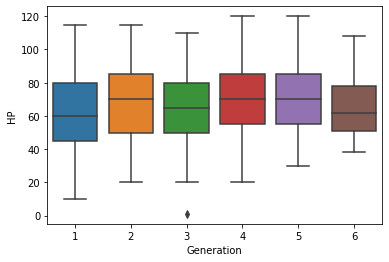

In [35]:
#The boxplot of HP across the different generations after removing the outliers

sns.boxplot(x = "Generation", y = "HP", data=df_hp_no_outliers)